Carregando as bibliotecas


In [1]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'pandas'

Importando o arquivo de vendas "default.csv"


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inspecionando os 10 primeiros objetos.


In [3]:
df_data = pd.read_csv('/content/drive/MyDrive/Data/Default.csv')
#df_adv = df_adv.iloc[: , 1:] #remove primeira coluna.
df_data.head(10)

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293

Convertendo as colunas de default e student de texto para números binários.


In [4]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_data["default"] = ord_enc.fit_transform(df_data[["default"]])
df_data["student"] = ord_enc.fit_transform(df_data[["student"]])

df_data.head()

default  student      balance        income
0      0.0      0.0   729.526495  44361.625074
1      0.0      1.0   817.180407  12106.134700
2      0.0      0.0  1073.549164  31767.138947
3      0.0      0.0   529.250605  35704.493935
4      0.0      0.0   785.655883  38463.495879

Calculando resumos estatísticos de todos os atributos.


In [5]:
df_data.describe()

default       student       balance        income
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       0.033300      0.294400    835.374886  33516.981876
std        0.179428      0.455795    483.714985  13336.639563
min        0.000000      0.000000      0.000000    771.967729
25%        0.000000      0.000000    481.731105  21340.462903
50%        0.000000      0.000000    823.636973  34552.644802
75%        0.000000      1.000000   1166.308386  43807.729272
max        1.000000      1.000000   2654.322576  73554.233495

Plotando histogramas de cada coluna.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79708b8c50>,
      dtype=object)

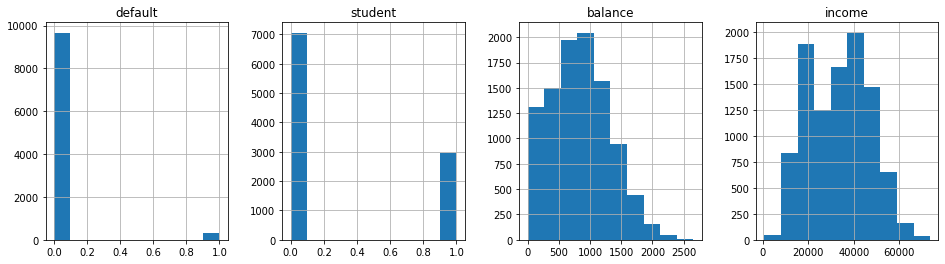

In [ ]:
df_data.hist(column=["default","student", "balance","income"], layout=(1,4), figsize=(16,4))

Vamos criar duas subamostras contendo 70% das observações para Treino e 30% das observações para teste.


In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_data,test_size=0.3, random_state=24)

X_train = df_train[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
X_test = df_test[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
y_train = df_train['default'].values.reshape(-1,1)
y_test = df_test['default'].values.reshape(-1,1)

Carregamos o pacote de regressão linear do Sci Kit Learn. Ele entrega os mesmos resultados do Stats Models, porém é focado em predição e não explicação dos dados passados.

Vamos estimar o modelo linear na base de treino, utilizando apenas a feature balance (saldo).


Text(0.5, 0, 'Balance')

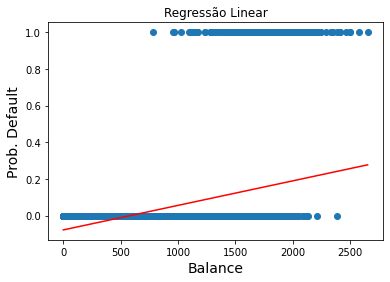

In [7]:
from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

modelo_linear.fit(X_train[:,1].reshape(-1,1), y_train)

plt.scatter(X_train[:,1].reshape(-1,1), y_train)

y_train_pred = modelo_linear.predict(np.c_[np.arange(0,2655)])

plt.plot(y_train_pred, "r-")
plt.title("Regressão Linear")
plt.ylabel("Prob. Default", fontsize=14) # not shown
plt.xlabel("Balance", fontsize=14)   

Estimamos o modelo logístico com a feature balance.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'Balance')

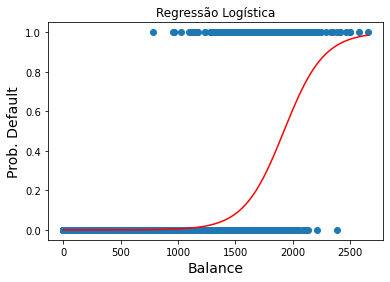

In [8]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()

modelo_log.fit(X_train[:,1].reshape(-1,1), y_train)

plt.scatter(X_train[:,1].reshape(-1,1), y_train)

y_train_pred = modelo_log.predict_proba(np.c_[np.arange(0,2655)])

plt.plot(y_train_pred[:,1], "r-")
plt.title("Regressão Logística")
plt.ylabel("Prob. Default", fontsize=14) # not shown
plt.xlabel("Balance", fontsize=14)                          


Obtendo os coeficientes do modelo logistico.


In [9]:
[modelo_log.intercept_,modelo_log.coef_]

[array([-11.01840668]), array([[0.005727]])]

Calculando a probabilidade de default para um cliente com balance igual a 1.000. O modelo retorna um vetor com dois valores. O primeiro valor é a probabiliade de ser 0 (1-p(x)) e o segundo é a probabilidade de ser 1 (p(x)). Normalmente, utilizados o segundo número do vetor nos testes de precisão.


In [ ]:
modelo_log.predict_proba(np.c_[1000])

array([[0.99499054, 0.00500946]])

Calculando a probabilidade de default para um cliente com balance igual a 2.000.


In [ ]:
modelo_log.predict_proba(np.c_[2000])

array([[0.39279041, 0.60720959]])

Estimando a regressão logística multivariada com as features student, balance e income na base de treinamento. Na sequência apresentando os coeficientes estimados.


In [10]:
modelo_log_multivariado = LogisticRegression()

modelo_log_multivariado.fit(X_train, y_train)

[modelo_log_multivariado.intercept_,modelo_log_multivariado.coef_]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([-2.89811595]),
 array([[-3.83918853e+00,  4.09599072e-03, -1.36499041e-04]])]

Predições para os dados de treino e teste com o modelo univariado usando apenas balance. Utilizando um cutoff de 50% para classificar entre zero e um.


In [11]:
y_train_pred_uni_prob = modelo_log.predict_proba(X_train[:,1].reshape(-1,1))[:,1]
y_train_pred_uni = np.array([1. if i> 0.5 else 0. for i in y_train_pred_uni_prob])

y_test_pred_uni_prob = modelo_log.predict_proba(X_test[:,1].reshape(-1,1))[:,1]
y_test_pred_uni = np.array([1. if i> 0.5 else 0. for i in y_test_pred_uni_prob])

In [12]:
erro_treino = y_train_pred_uni != y_train
erro_test = y_test_pred_uni != y_test

[np.mean(erro_treino), np.mean(erro_test)]

[0.04822555102040817, 0.04701]

Predições para os dados de treino e teste com o modelo multivariado usando apenas student, balance e income. Utilizando um cutoff de 50% para classificar entre zero e um.


In [13]:
y_train_pred_multi_prob = modelo_log_multivariado.predict_proba(X_train)[:,1]
y_train_pred_multi = np.array([1. if i> 0.50 else 0. for i in y_train_pred_multi_prob])

y_test_pred_multi_prob = modelo_log_multivariado.predict_proba(X_test)[:,1]
y_test_pred_multi = np.array([1. if i> 0.50 else 0. for i in y_test_pred_multi_prob])

In [14]:
erro_treino = y_train_pred_multi != y_train
erro_test = y_test_pred_multi != y_test

[np.mean(erro_treino), np.mean(erro_test)]

[0.04569273469387755, 0.043274]

Calculando a matriz de confusão, utiliando o pacote metrics.


In [15]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_multi, labels=[1,0])

In [16]:
conf_matrix

array([[  16,   83],
       [  17, 2884]])

Convertamos a matriz de confusão de inteiros para ponto flutuante.


In [17]:
conf_matrix = conf_matrix.astype(float)
conf_matrix 

array([[  16.,   83.],
       [  17., 2884.]])

Outra forma de apresentar a matriz de confusão é como taxas.


In [18]:
P = sum(y_test)
N = sum(y_test==0)

conf_matrix[0,0] = conf_matrix[0,0]/P
conf_matrix[1,0] = conf_matrix[1,0]/N
conf_matrix[0,1] = conf_matrix[0,1]/P
conf_matrix[1,1] = conf_matrix[1,1]/N

In [19]:
conf_matrix

array([[0.16161616, 0.83838384],
       [0.00586005, 0.99413995]])

Calcular a precisão (Precision) TP/(TP+FP).


In [20]:
metrics.precision_score(y_test, y_test_pred_multi)

0.48484848484848486

Estimando a curva ROC.


In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_multi_prob)

Text(0.5, 1.0, 'ROC curve')

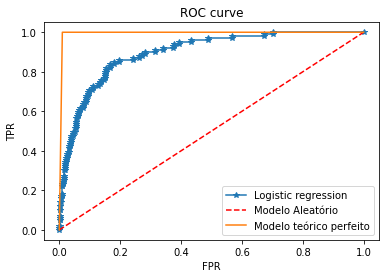

In [22]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.plot([0,0.01, 1], [0,1,1])
plt.legend(['Logistic regression', 'Modelo Aleatório','Modelo teórico perfeito'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

Estimando o AUC.


In [23]:
metrics.roc_auc_score(y_test, y_test_pred_multi_prob)

0.8970156581325144

Cut-off Ótimo.

Usando a curva ROC para achar o melhor ponto de corte para o nosso modelo. Procuramos o ponto de corte que possui a maior distância entre a taxa de verdadeiros positivos e falsos positivos.

Fazemo isto na amostra de treino para aplicar em teste.


In [70]:

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_multi_prob)

optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), key=lambda i: i[0], reverse=True)[0][1]

In [71]:
optimal_proba_cutoff

0.024203381072327963

In [72]:
y_train_pred_multi_prob = modelo_log_multivariado.predict_proba(X_train)[:,1]
y_train_pred_multi = np.array([1. if i> optimal_proba_cutoff else 0. for i in y_train_pred_multi_prob])

y_test_pred_multi_prob = modelo_log_multivariado.predict_proba(X_test)[:,1]
y_test_pred_multi = np.array([1. if i> optimal_proba_cutoff else 0. for i in y_test_pred_multi_prob])

In [73]:
erro_treino = y_train_pred_multi != y_train
erro_test = y_test_pred_multi != y_test

[np.mean(erro_treino), np.mean(erro_test)]

[0.27351289795918365, 0.27584]

Calculando a matriz de confusão, utiliando o pacote metrics.


In [74]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_multi, labels=[1,0])

In [75]:
conf_matrix

array([[  85,   14],
       [ 695, 2206]])

Convertamos a matriz de confusão de inteiros para ponto flutuante.


In [76]:
conf_matrix = conf_matrix.astype(float)
conf_matrix 

array([[  85.,   14.],
       [ 695., 2206.]])

Outra forma de apresentar a matriz de confusão é como taxas.


In [77]:
P = sum(y_test)
N = sum(y_test==0)

conf_matrix[0,0] = conf_matrix[0,0]/P
conf_matrix[1,0] = conf_matrix[1,0]/N
conf_matrix[0,1] = conf_matrix[0,1]/P
conf_matrix[1,1] = conf_matrix[1,1]/N

In [78]:
conf_matrix

array([[0.85858586, 0.14141414],
       [0.23957256, 0.76042744]])

In [79]:
metrics.precision_score(y_test, y_test_pred_multi)

0.10897435897435898